In [41]:
Analysis
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

SyntaxError: invalid syntax (<ipython-input-41-8f5f0184a0a4>, line 2)

In [10]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [11]:
# Import API key
from API_Keys import weather_api_key

In [12]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [13]:
# Output File (CSV)
output_data_file = "output_data_file/cities.csv"

In [14]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)
        

630

In [16]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | omsukchan
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | talcahuano
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | yakovlevo
Processing Record 11 of Set 1 | shenjiamen
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | san antonio
Processing Record 14 of Set 1 | valenca
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | biak
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | saint george
Processing Re

Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | atuona
Processing Record 43 of Set 4 | ciudad bolivar
Processing Record 44 of Set 4 | ayan
Processing Record 45 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | san lorenzo
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | shar
Processing Record 0 of Set 5 | sindou
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | boa vista
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | viedma
Processing Record 7 of Set 5 | arrifes
Processing Record 8 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 5 | torbat-e jam
Processing

Processing Record 27 of Set 8 | wahiawa
Processing Record 28 of Set 8 | marcona
City not found. Skipping...
Processing Record 29 of Set 8 | darnah
Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set 8 | kemijarvi
Processing Record 33 of Set 8 | arinos
Processing Record 34 of Set 8 | la ronge
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | hovd
Processing Record 37 of Set 8 | saryagash
Processing Record 38 of Set 8 | de-kastri
Processing Record 39 of Set 8 | auki
Processing Record 40 of Set 8 | tomelloso
Processing Record 41 of Set 8 | dubbo
Processing Record 42 of Set 8 | inta
Processing Record 43 of Set 8 | mineiros
Processing Record 44 of Set 8 | aklavik
Processing Record 45 of Set 8 | baishishan
Processing Record 46 of Set 8 | kingman
Processing Record 47 of Set 8 | taoudenni
Processing Record 48 of Set 8 | lugovoy
Processing Record 49 of Set 8 | upernavik
Processing Record 0 of Set 9 | yar-sale
Process

Processing Record 15 of Set 12 | surt
Processing Record 16 of Set 12 | acapulco
Processing Record 17 of Set 12 | la libertad
Processing Record 18 of Set 12 | severodvinsk
Processing Record 19 of Set 12 | stornoway
Processing Record 20 of Set 12 | lieksa
Processing Record 21 of Set 12 | kimbe
Processing Record 22 of Set 12 | newport
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | kaniv
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | gobabis
Processing Record 27 of Set 12 | santa cruz de la palma
Processing Record 28 of Set 12 | santa rosa
Processing Record 29 of Set 12 | ovalle
Processing Record 30 of Set 12 | lithakia
Processing Record 31 of Set 12 | ous
Processing Record 32 of Set 12 | folkestone
Processing Record 33 of Set 12 | sambava
Processing Record 34 of Set 12 | campbell river
Processing Record 35 of Set 12 | ekhabi
Processing Record 36 of Set 12 | irun
Processing Record 37 of Set 12 | gat
Processing Record 38 of Set 12 | 

In [18]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data_file/cities.csv'

In [19]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,80.60,88,75,9.17,TO,1609794070
1,nanortalik,60.14,-45.24,27.12,96,99,8.41,GL,1609794196
2,kapaa,22.08,-159.32,78.80,69,40,9.17,US,1609794196
3,omsukchan,62.53,155.80,-30.30,79,100,5.03,RU,1609794197
4,mataura,-46.19,168.86,55.00,92,100,1.01,NZ,1609794197


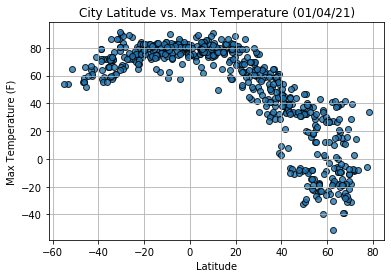

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cityvsmax_Weather.png")

# Show plot
plt.show()

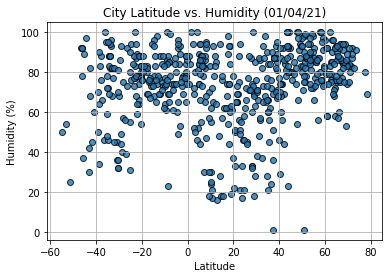

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("citylatvshumidity.png")

# Show plot
plt.show()

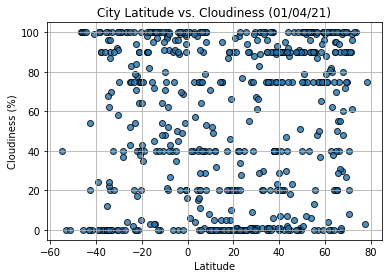

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("citylatitudevscloudiness.png")

# Show plot
plt.show()

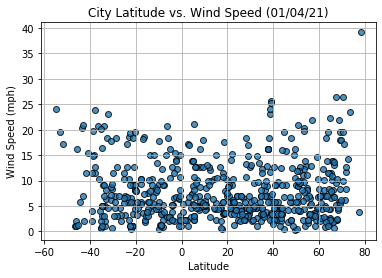

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latitudevswindspeed.png")

# Show plot
plt.show()

In [27]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-squared is: -0.8564719679055681


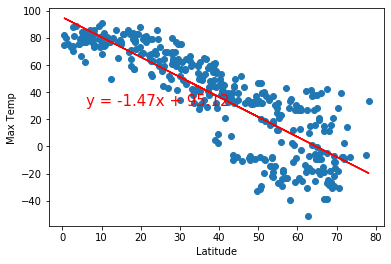

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.5685394440040402


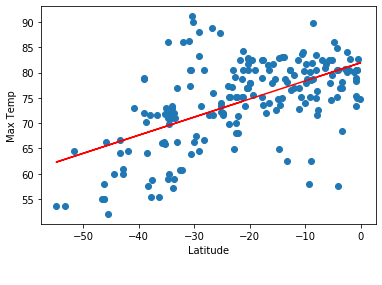

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

In [31]:
The high r value indicates a strong positive correlation between latitude and max temperature.

SyntaxError: invalid syntax (<ipython-input-31-5b4700d34daf>, line 1)

The r-squared is: 0.3383205273758377


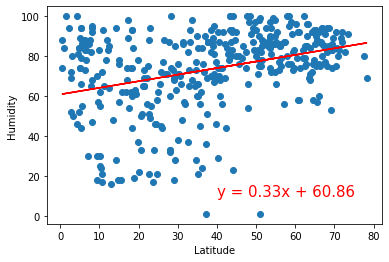

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.22518195649518563


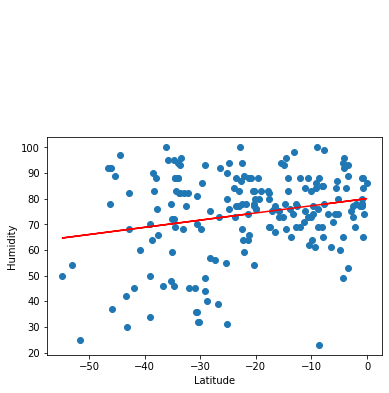

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

In [34]:
The low r values indicate a weak to no relationship between humidity and latitude.

SyntaxError: invalid syntax (<ipython-input-34-378db06fc2d2>, line 1)

The r-squared is: 0.2778415120831257


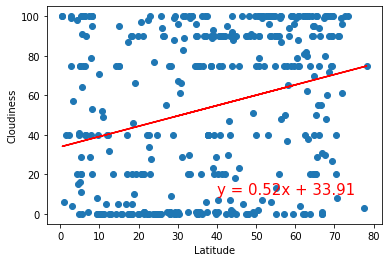

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.1553996977214966


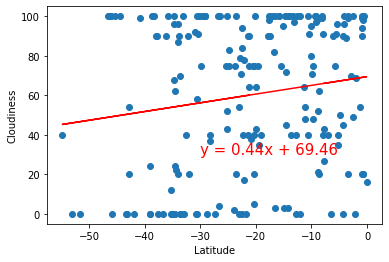

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [37]:

The low r values indicate a weak positive relationship between latitude and cloudiness

SyntaxError: invalid syntax (<ipython-input-37-f0ad81d51e19>, line 1)

The r-squared is: 0.12270769657705081


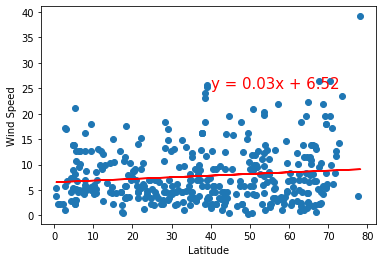

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.17367706565081623


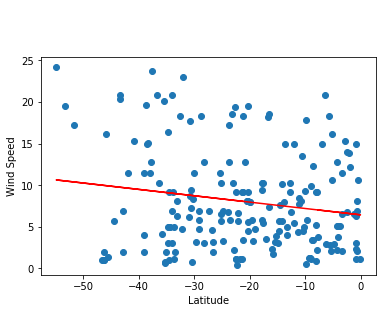

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

In [40]:
The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.

SyntaxError: invalid syntax (<ipython-input-40-79466fa6f6d7>, line 1)